In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC 

from sklearn.tree import DecisionTreeClassifier


In [3]:
file = 'Data\WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(file)

In [4]:
print(df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [8]:
from sklearn.preprocessing import LabelEncoder

# Supongamos que tienes una columna llamada 'BusinessTravel'
le = LabelEncoder()
df['BusinessTravel_encoded'] = le.fit_transform(df['BusinessTravel'])
df['Department_encoded'] = le.fit_transform(df['Department'])

print(df[['Department_encoded', 'Department']])


      Department_encoded              Department
0                      2                   Sales
1                      1  Research & Development
2                      1  Research & Development
3                      1  Research & Development
4                      1  Research & Development
...                  ...                     ...
1465                   1  Research & Development
1466                   1  Research & Development
1467                   1  Research & Development
1468                   2                   Sales
1469                   1  Research & Development

[1470 rows x 2 columns]


Correlation Matrix

In [6]:
df_clean = pd.get_dummies(df, drop_first=True)


Heat Map

<Figure size 1200x800 with 0 Axes>

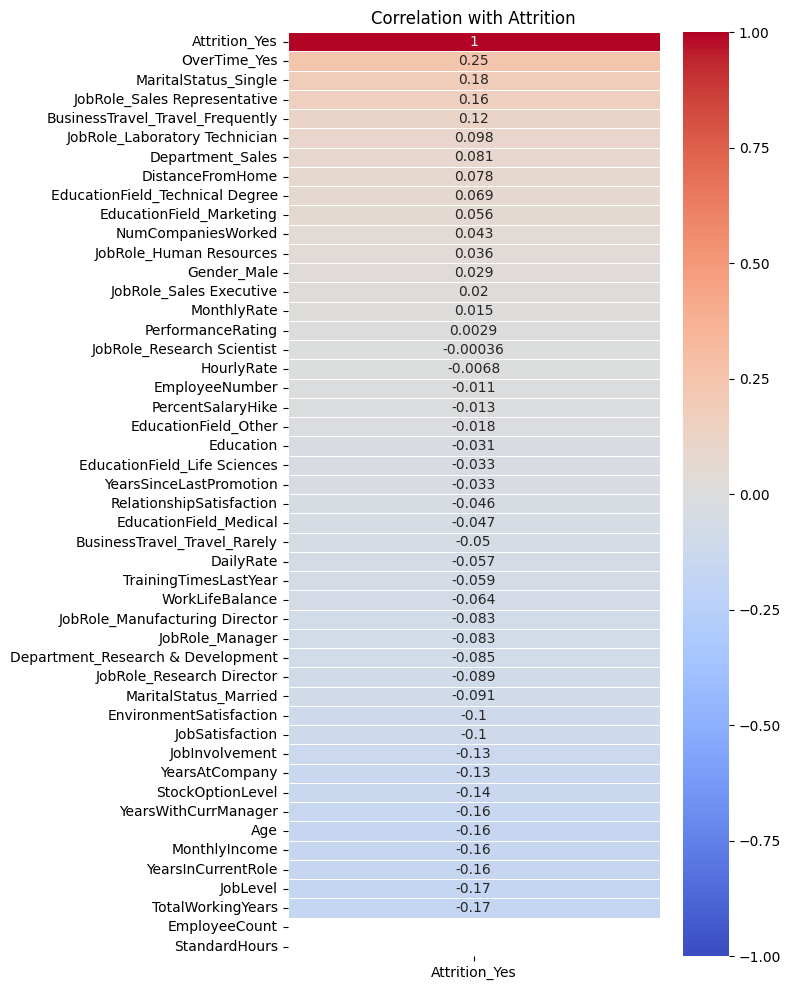

In [7]:
correlation_matrix = df_clean.corr()
plt.figure(figsize=(12, 8))  # Adjust the size as necessary
attrition_correlation = correlation_matrix[['Attrition_Yes']].sort_values(by='Attrition_Yes', ascending=False)

# Step 5: Display the correlation matrix as a heatmap
plt.figure(figsize=(6, 12))
sns.heatmap(attrition_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

# Step 6: Add title and show the plot
plt.title('Correlation with Attrition')
plt.show()
 

Maximun Correlation With Attrition : 

* OverTime_Yes
* MaritalStatus_Single
* JobRole_Sales Representative


Negative Maximun Correlation With Attrition :
* TotalWorking Years
* Job Level 
* Years In Current Role 
* Monthly Income 
* Age 
* Years With Curr Manager 
* Stock Option level 
* Years At Company 
* Job Involvement

Collinearity with Eigenvector

In [8]:
correlation_matrix_clean = correlation_matrix.fillna(0)

eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix_clean)

eigen_df = pd.DataFrame(eigenvectors, columns=[f'Eigenvector_{i+1}' for i in range(len(eigenvectors))], index=correlation_matrix_clean.columns)
print("Eigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigen_df)


Eigenvalues:
[5.38420787 3.47458592 2.11700249 1.99175567 1.78823501 1.72493572
 1.60916212 0.00928326 0.02164233 0.03359417 0.0363122  0.1023571
 0.14181608 0.16811246 0.19772321 0.21843752 0.22254635 0.24879705
 0.27798288 0.48084419 0.50367403 0.62442105 1.3530824  0.68293433
 1.32332245 1.30048667 1.25207165 0.7538461  1.21141042 1.18876515
 1.14819114 1.13992465 0.79067885 1.09620301 0.83802298 0.86670911
 0.87131136 0.90110343 1.03990218 1.03104872 1.0233117  1.00269137
 0.97200727 0.95457151 0.95036617 0.93060872 0.         0.        ]

Eigenvectors:
                                   Eigenvector_1  Eigenvector_2  \
Age                                    -0.257764      -0.063847   
DailyRate                               0.001101      -0.019915   
DistanceFromHome                       -0.000881       0.015632   
Education                              -0.070370       0.007045   
EmployeeCount                           0.000000       0.000000   
EmployeeNumber                    

In [9]:


eigenvalues = np.array([5.38420787, 3.47458592, 2.11700249, 1.99175567, 1.78823501, 1.72493572,
                        1.60916212, 0.00928326, 0.02164233, 0.03359417, 0.0363122, 0.1023571, 
                        0.14181608, 0.16811246, 0.19772321, 0.21843752, 0.22254635, 0.24879705, 
                        0.27798288, 0.48084419, 0.50367403, 0.62442105, 1.3530824, 0.68293433, 
                        1.32332245, 1.30048667, 1.25207165, 0.7538461, 1.21141042, 1.18876515,
                        1.14819114, 1.13992465, 0.79067885, 1.09620301, 0.83802298, 0.86670911,
                        0.87131136, 0.90110343, 1.03990218, 1.03104872, 1.0233117, 1.00269137,
                        0.97200727, 0.95457151, 0.95036617, 0.93060872, 0., 0.])

# Identify small eigenvalues and their indices
small_eigenvalue_threshold = 0.1
small_eigenvalue_indices = np.where(eigenvalues < small_eigenvalue_threshold)[0]

eigenvectors_df = pd.DataFrame(eigenvectors, index=df_clean.columns, columns=[f'Eigenvector_{i+1}' for i in range(len(eigenvalues))])

important_variables = eigenvectors_df.iloc[:, small_eigenvalue_indices].apply(lambda x: x.abs().idxmax(), axis=0)
print(f"Variables contributing to multicollinearity: {important_variables}")

df_reduced = df_clean.drop(columns=important_variables)



Variables contributing to multicollinearity: Eigenvector_8     Department_Research & Development
Eigenvector_9          EducationField_Life Sciences
Eigenvector_10                        MonthlyIncome
Eigenvector_11              JobRole_Sales Executive
Eigenvector_47                        EmployeeCount
Eigenvector_48                        StandardHours
dtype: object


Test/Train Split

In [10]:

# The variables contributing to multicollinearity, identified in the previous analysis
variables_to_drop = [
    #'Department_Research & Development', 
    'EducationField_Life Sciences', 
    'MonthlyIncome', 
    'JobRole_Sales Executive', 
    'EmployeeCount', 
    'StandardHours'
]

# Step 1: Remove these variables from the dataset
df_clean_reduced = df_clean.drop(columns=variables_to_drop)

# Step 2: Define X (features) and y (target)
X = df_clean_reduced.drop(columns='Attrition_Yes')  # Features (all columns except the target)
y = df_clean_reduced['Attrition_Yes']  # Target (Attrition)

# Step 3: Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Output the shape of the training and testing data to verify
print(f"Training Data Shape: {X_train.shape}")
print(f"Test Data Shape: {X_test.shape}")


Training Data Shape: (1029, 42)
Test Data Shape: (441, 42)


In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)



C:\Users\yourk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=42)

In [20]:
# Calcular las probabilidades predichas
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Cambiar el umbral de 0.5 a, por ejemplo, 0.3
y_pred_adjusted = (y_pred_proba >= 0.3).astype(int)


In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)


C:\Users\yourk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=42)

Logistic Regression

In [13]:
# Step 1: Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=2000, random_state=42)

In [17]:
logreg.fit(X_train, y_train)

C:\Users\yourk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=42)

In [22]:
y_pred = logreg.predict(X_test)
# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the results
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.8730

Confusion Matrix:
[[365  15]
 [ 41  20]]

Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.96      0.93       380
        True       0.57      0.33      0.42        61

    accuracy                           0.87       441
   macro avg       0.74      0.64      0.67       441
weighted avg       0.85      0.87      0.86       441



SVM

In [ ]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)


In [13]:
y_pred_svm = svm_model.predict(X_test)

# Step 4: Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

# Output the results
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print("\nSVM Confusion Matrix:")
print(conf_matrix_svm)
print("\nSVM Classification Report:")
print(class_report_svm)

SVM Accuracy: 0.8571

SVM Confusion Matrix:
[[373   7]
 [ 56   5]]

SVM Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.98      0.92       380
        True       0.42      0.08      0.14        61

    accuracy                           0.86       441
   macro avg       0.64      0.53      0.53       441
weighted avg       0.81      0.86      0.81       441



SVG

Polinomial Kernel

In [14]:
svm_poly = SVC(kernel='poly', degree=7, random_state=42)
svm_poly.fit(X_train, y_train)


SVC(degree=7, kernel='poly', random_state=42)

In [15]:
y_pred_svm_poly = svm_poly.predict(X_test)

# Step 4: Evaluate the SVM model
accuracy_svm_poly = accuracy_score(y_test, y_pred_svm_poly)
conf_matrix_svm_poly = confusion_matrix(y_test, y_pred_svm_poly)
class_report_svm_poly = classification_report(y_test, y_pred_svm_poly)

# Output the results
print(f"SVM (Polynomial Kernel) Accuracy: {accuracy_svm_poly:.4f}")
print("\nSVM (Polynomial Kernel) Confusion Matrix:")
print(conf_matrix_svm_poly)
print("\nSVM (Polynomial Kernel) Classification Report:")
print(class_report_svm_poly)

SVM (Polynomial Kernel) Accuracy: 0.8617

SVM (Polynomial Kernel) Confusion Matrix:
[[380   0]
 [ 61   0]]

SVM (Polynomial Kernel) Classification Report:
              precision    recall  f1-score   support

       False       0.86      1.00      0.93       380
        True       0.00      0.00      0.00        61

    accuracy                           0.86       441
   macro avg       0.43      0.50      0.46       441
weighted avg       0.74      0.86      0.80       441



C:\Users\yourk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yourk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yourk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

Decision Tree

In [16]:
decision_tree = DecisionTreeClassifier(random_state=52)

# Step 2: Train the Decision Tree model on the training data
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=52)

In [17]:
y_pred_tree = decision_tree.predict(X_test)

# Step 4: Evaluate the Decision Tree model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
class_report_tree = classification_report(y_test, y_pred_tree)

# Output the results
print(f"Decision Tree Accuracy: {accuracy_tree:.4f}")
print("\nDecision Tree Confusion Matrix:")
print(conf_matrix_tree)
print("\nDecision Tree Classification Report:")
print(class_report_tree)

Decision Tree Accuracy: 0.7959

Decision Tree Confusion Matrix:
[[332  48]
 [ 42  19]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.87      0.88       380
        True       0.28      0.31      0.30        61

    accuracy                           0.80       441
   macro avg       0.59      0.59      0.59       441
weighted avg       0.80      0.80      0.80       441



Performance Evaluation

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calcula las métricas para Logistic Regression
logreg_accuracy = accuracy_score(y_test, y_pred)
logreg_precision = precision_score(y_test, y_pred)
logreg_recall = recall_score(y_test, y_pred)
logreg_f1 = f1_score(y_test, y_pred)
logreg_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])

# Calcula las métricas para SVM (Polynomial Kernel)
svm_accuracy = accuracy_score(y_test, y_pred_svm_poly)
svm_precision = precision_score(y_test, y_pred_svm_poly)
svm_recall = recall_score(y_test, y_pred_svm_poly)
svm_f1 = f1_score(y_test, y_pred_svm_poly)
svm_roc_auc = roc_auc_score(y_test, svm_poly.decision_function(X_test))

# Calcula las métricas para Decision Tree
tree_accuracy = accuracy_score(y_test, y_pred_tree)
tree_precision = precision_score(y_test, y_pred_tree)
tree_recall = recall_score(y_test, y_pred_tree)
tree_f1 = f1_score(y_test, y_pred_tree)
tree_roc_auc = roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:, 1])

# Mostrar resultados
print("=== Logistic Regression ===")
print(f"Accuracy: {logreg_accuracy:.4f}")
print(f"Precision: {logreg_precision:.4f}")
print(f"Recall: {logreg_recall:.4f}")
print(f"F1-Score: {logreg_f1:.4f}")
print(f"ROC-AUC: {logreg_roc_auc:.4f}\n")

print("=== SVM (Polynomial Kernel) ===")
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F1-Score: {svm_f1:.4f}")
print(f"ROC-AUC: {svm_roc_auc:.4f}\n")

print("=== Decision Tree ===")
print(f"Accuracy: {tree_accuracy:.4f}")
print(f"Precision: {tree_precision:.4f}")
print(f"Recall: {tree_recall:.4f}")
print(f"F1-Score: {tree_f1:.4f}")
print(f"ROC-AUC: {tree_roc_auc:.4f}")

=== Logistic Regression ===
Accuracy: 0.8730
Precision: 0.5714
Recall: 0.3279
F1-Score: 0.4167
ROC-AUC: 0.7869

=== SVM (Polynomial Kernel) ===
Accuracy: 0.8617
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
ROC-AUC: 0.6039

=== Decision Tree ===
Accuracy: 0.7959
Precision: 0.2836
Recall: 0.3115
F1-Score: 0.2969
ROC-AUC: 0.5926


C:\Users\yourk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Result Graph 

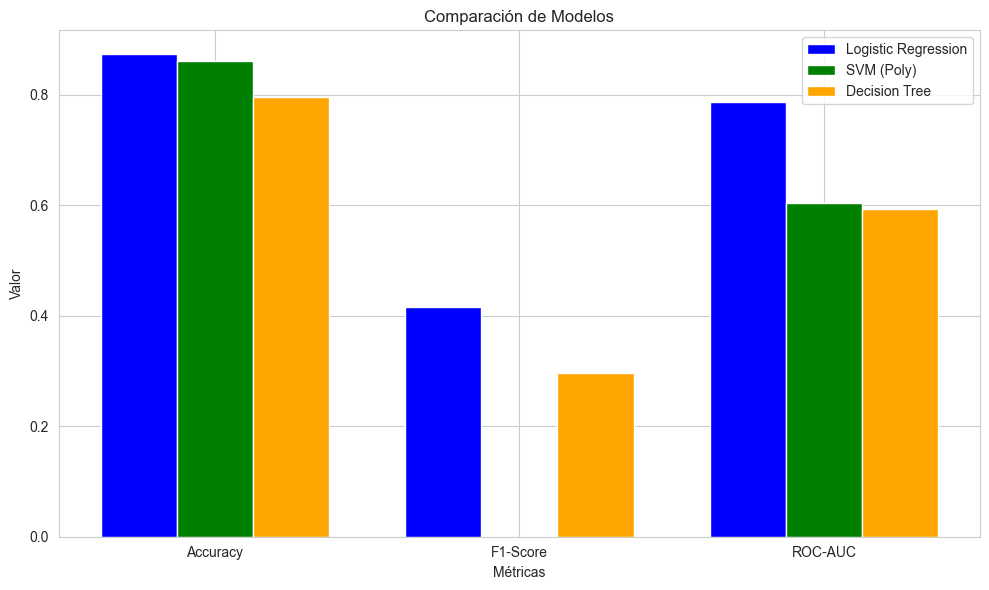

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Comparar modelos usando Accuracy, F1-Score y ROC-AUC
metrics = ['Accuracy', 'F1-Score', 'ROC-AUC']
logreg_metrics = [logreg_accuracy, logreg_f1, logreg_roc_auc]
svm_metrics = [svm_accuracy, svm_f1, svm_roc_auc]
tree_metrics = [tree_accuracy, tree_f1, tree_roc_auc]

# Gráfico de comparación
x = np.arange(len(metrics))  # posiciones de las etiquetas
width = 0.25  # ancho de las barras

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, logreg_metrics, width, label='Logistic Regression', color='blue')
rects2 = ax.bar(x, svm_metrics, width, label='SVM (Poly)', color='green')
rects3 = ax.bar(x + width, tree_metrics, width, label='Decision Tree', color='orange')

# Añadir etiquetas y título
ax.set_xlabel('Métricas')
ax.set_ylabel('Valor')
ax.set_title('Comparación de Modelos')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()
